In [ ]:
'''
# Automobile MPG Analysis Report

This report aims to investigate the impact of various automobile engine factors on the vehicle's MPG.
The dataset 'auto-mpg.csv' contains information on cylinders, displacement, horsepower, weight, etc.

### Dataset Modifications
- Replaced '?' values with NaN.
- Dropped rows with missing values.

### Exploratory Data Analysis
- Visualized the relationship between horsepower and MPG using scatter plots.
- Conducted linear regression analysis to understand the correlation between independent variables and MPG.

'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics

# Load the dataset
data = pd.read_csv('auto-mpg(1).csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

    mpg  cylinder  displacement horsepower  weight  acceleration  model year  \
0  18.0         8         307.0        130    3504          12.0          70   
1  15.0         8         350.0        165    3693          11.5          70   
2  18.0         8         318.0        150    3436          11.0          70   
3  16.0         8         304.0        150    3433          12.0          70   
4  17.0         8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [3]:
import pandas as pd

# Load the dataset, replacing '?' with NaN
data = pd.read_csv('auto-mpg(1).csv', na_values='?')

# Drop rows with NaN values
data = data.dropna()

In [4]:
print(data)

      mpg  cylinder  displacement  horsepower  weight  acceleration  \
0    18.0         8         307.0       130.0    3504          12.0   
1    15.0         8         350.0       165.0    3693          11.5   
2    18.0         8         318.0       150.0    3436          11.0   
3    16.0         8         304.0       150.0    3433          12.0   
4    17.0         8         302.0       140.0    3449          10.5   
..    ...       ...           ...         ...     ...           ...   
393  27.0         4         140.0        86.0    2790          15.6   
394  44.0         4          97.0        52.0    2130          24.6   
395  32.0         4         135.0        84.0    2295          11.6   
396  28.0         4         120.0        79.0    2625          18.6   
397  31.0         4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

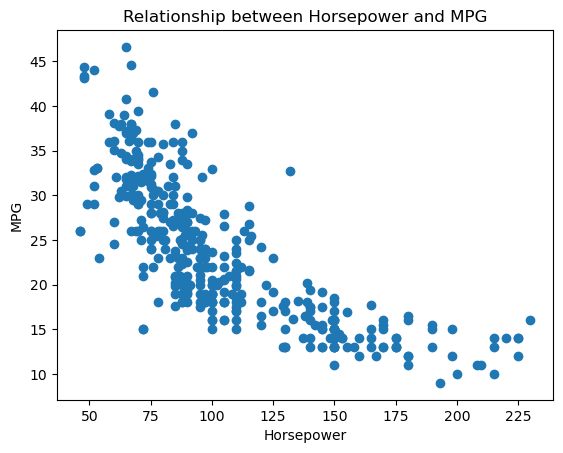

Correlation between Horsepower and MPG: -0.7784


In [18]:
# Create visual plots and charts
# Creating a scatter plot between 'mpg' and 'horsepower'
plt.scatter(data['horsepower'], data['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between Horsepower and MPG')
plt.show()

# Calculating the correlation between 'horsepower' and 'mpg'
correlation = data['horsepower'].corr(data['mpg'])
print(f"Correlation between Horsepower and MPG: {correlation:.4f}")


In [6]:
# Selecting the first 300 samples
subset_data = data.iloc[:300]

# Simple Linear Regression with 'horsepower'
X_simple = subset_data[['horsepower']]
y_simple = subset_data['mpg']

# Multiple Linear Regression with multiple variables
X_multiple = subset_data[['cylinder', 'displacement', 'weight', 'acceleration']]

# Splitting the data
# Simple Linear Regression
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Multiple Linear Regression
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multiple, y_simple, test_size=0.2, random_state=42)

# Fitting the models
model_simple = LinearRegression().fit(X_train_simple, y_train_simple)
model_multi = LinearRegression().fit(X_train_multi, y_train_multi)

# Multiple R-squared
r_squared_simple = model_simple.score(X_test_simple, y_test_simple)
r_squared_multi = model_multi.score(X_test_multi, y_test_multi)

# Adjusted R-squared
n_simple, k_simple = X_test_simple.shape[0], X_test_simple.shape[1]
n_multi, k_multi = X_test_multi.shape[0], X_test_multi.shape[1]

# Calculate adjusted R-squared
adjusted_r_squared_simple = 1 - (1 - r_squared_simple) * (n_simple - 1) / (n_simple - k_simple - 1)
adjusted_r_squared_multi = 1 - (1 - r_squared_multi) * (n_multi - 1) / (n_multi - k_multi - 1)

# Complete Linear Regression Equation for multiple regression
X_multi = sm.add_constant(X_test_multi)  # Adding a constant term for the intercept
model_multi_stats = sm.OLS(y_test_multi, X_multi).fit()
equation_multi = f'MPG = {model_multi_stats.params["const"]:.4f} + ' + ' + '.join([f'{model_multi_stats.params[col]:.4f}*{col}' for col in X_test_multi.columns])

# Print the results
print('Multiple R-squared (Simple Linear Regression):', r_squared_simple)
print('Adjusted R-squared (Simple Linear Regression):', adjusted_r_squared_simple)

print('\nMultiple R-squared (Multiple Linear Regression):', r_squared_multi)
print('Adjusted R-squared (Multiple Linear Regression):', adjusted_r_squared_multi)

print('\nComplete Linear Regression Equation (Multiple Linear Regression):')
print(equation_multi)

# Complete Linear Regression Equation (Simple)
intercept_simple = model_simple.intercept_
coeff_simple = model_simple.coef_[0]
print(f"Simple Linear Regression Equation: MPG = {intercept_simple:.2f} + {coeff_simple:.2f} * Horsepower")


Multiple R-squared (Simple Linear Regression): 0.6109374374583166
Adjusted R-squared (Simple Linear Regression): 0.6042294622420807

Multiple R-squared (Multiple Linear Regression): 0.762240313544454
Adjusted R-squared (Multiple Linear Regression): 0.7449486999840507

Complete Linear Regression Equation (Multiple Linear Regression):
MPG = 38.9644 + -0.4973*cylinder + -0.0098*displacement + -0.0039*weight + -0.0579*acceleration
Simple Linear Regression Equation: MPG = 35.31 + -0.13 * Horsepower


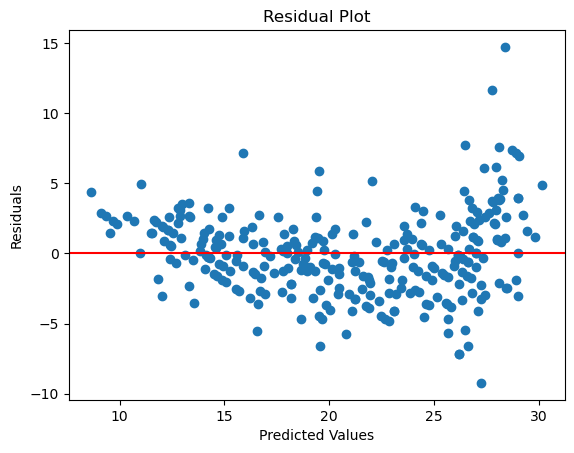

In [11]:
# Fitting the model using all available data
model_best = LinearRegression().fit(X_multiple, y_simple)

# Predicting on all available data
y_pred_best = model_best.predict(X_multiple)

# Calculating residuals
residuals = y_simple - y_pred_best

# Plotting the residuals
plt.scatter(y_pred_best, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Adding a horizontal line at 0
plt.title('Residual Plot')
plt.show()


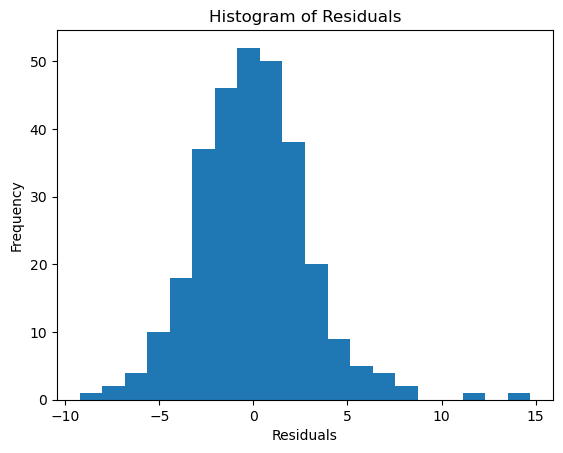

In [12]:
# Plotting a histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


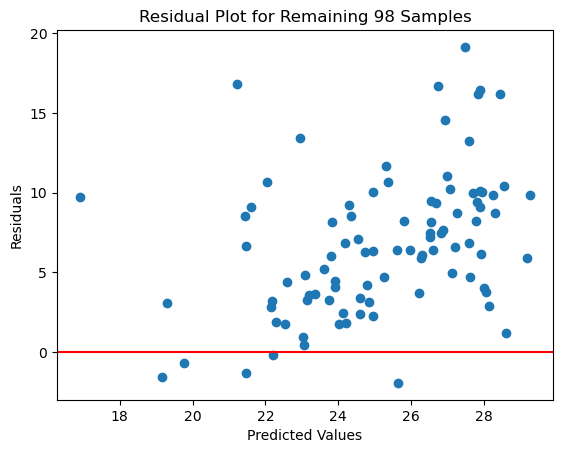

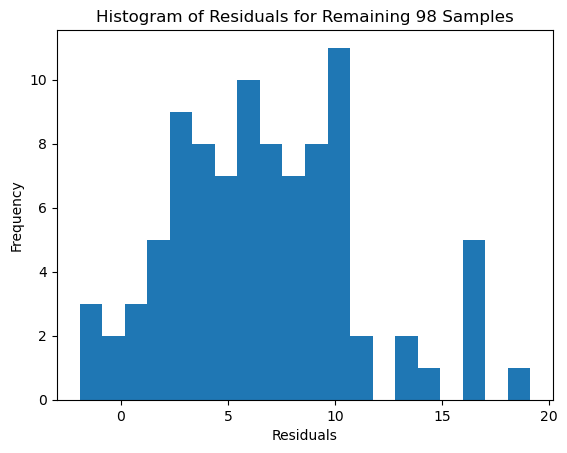

In [16]:
# Assuming X_remaining represents the remaining 98 samples for the variables used in the multiple linear regression model
X_remaining = data.iloc[300:][['cylinder', 'displacement', 'weight', 'acceleration']]

# Predicting on the remaining data
y_pred_remaining = model_best.predict(X_remaining)

# Calculating residuals
residuals_remaining = data.iloc[300:]['mpg'] - y_pred_remaining

# Plotting the residuals
plt.scatter(y_pred_remaining, residuals_remaining)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')  # Adding a horizontal line at 0
plt.title('Residual Plot for Remaining 98 Samples')
plt.show()

# Plotting a histogram of residuals
plt.hist(residuals_remaining, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Remaining 98 Samples')
plt.show()


In [17]:
# Assuming y_actual represents the actual reported MPG for the remaining 98 samples
y_actual = data.iloc[300:]['mpg']

# Creating a DataFrame to compare actual vs. predicted MPG
comparison_df = pd.DataFrame({'Actual MPG': y_actual, 'Predicted MPG': y_pred_remaining})
print(comparison_df)


     Actual MPG  Predicted MPG
302        34.5      26.873399
303        31.8      28.047689
304        37.3      27.069098
305        28.4      23.922739
306        28.8      23.618772
..          ...            ...
393        27.0      23.356719
394        44.0      27.824480
395        32.0      25.625076
396        28.0      24.606253
397        31.0      24.188748

[92 rows x 2 columns]
